# Final Project

In [77]:
# Import statements
import os
import re
import nltk
import pandas as pd
import numpy as np
from afinn import Afinn
import matplotlib.pyplot as plt

In [78]:
def create_df(c):
    df = pd.DataFrame()
    divider = []
    names = []
    for f in os.listdir("tweets/%s" % c):
        try:
            dft = pd.read_csv("tweets/%s/%s" % (c, f))
            if len(divider) == 0:
                divider.append(len(dft) - 1)
            else:
                divider.append(len(dft) + divider[-1])
            df = pd.concat([df, dft])
            # parse output_name.csv string
            names.append(f[7:][:-4])
        except:
            print(f)
    return df, divider, names

In [79]:
categories = ["fast food", "airlines", "leagues", "colleges", "streaming platforms", "news", "tech giants", "celebrities"]

fast_food, ff_divider, ff_names = create_df(categories[0])
airlines, al_divider, al_names = create_df(categories[1])
leagues, lg_divider, lg_names = create_df(categories[2])
colleges, cl_divider, cl_names = create_df(categories[3])
streaming, st_divider, st_names = create_df(categories[4])
news, nw_divider, nw_names = create_df(categories[5])
tech, tg_divider, tg_names = create_df(categories[6])
celebs, cb_divider, cb_names = create_df(categories[7])


                   date    username               to  replies  retweets  \
0   2019-11-28 01:01:08  jimmyjohns              NaN        2         5   
1   2019-11-27 17:43:19  jimmyjohns              NaN        1         0   
2   2019-11-27 17:33:00  jimmyjohns         _amb333r        0         0   
3   2019-11-27 17:11:32  jimmyjohns      THYCROSSMAN        1         1   
4   2019-11-27 16:59:28  jimmyjohns    thatboyjoelll        1         2   
..                  ...         ...              ...      ...       ...   
95  2019-11-26 18:53:00  jimmyjohns   BoostCreditLLC        0         0   
96  2019-11-26 18:51:52  jimmyjohns  davidjdickerson        0         0   
97  2019-11-26 18:44:33  jimmyjohns     TheRosenOne1        0         0   
98  2019-11-26 16:51:24  jimmyjohns          shahcma        1         0   
99  2019-11-26 16:48:00  jimmyjohns        gisell_gg        0         0   

    favorites                                               text  geo  \
0          63  these parti

                   date   username               to  replies  retweets  \
0   2019-11-28 06:00:10  McDonalds      NiqueSaidIt        0         0   
1   2019-11-28 05:58:48  McDonalds       LeahRekati        0         0   
2   2019-11-28 05:57:25  McDonalds     ChloeDutton9        0         0   
3   2019-11-28 05:56:47  McDonalds      tanner_hake        0         0   
4   2019-11-28 05:56:21  McDonalds      tpmoneyTGOD        0         0   
..                  ...        ...              ...      ...       ...   
95  2019-11-28 01:57:55  McDonalds     chorizojonez        0         1   
96  2019-11-28 01:57:55  McDonalds  _brittneyharvey        0         0   
97  2019-11-28 01:21:05  McDonalds     Lauuren_1234        0         0   
98  2019-11-28 01:20:26  McDonalds  gonzaleztrisha6        0         0   
99  2019-11-28 01:17:08  McDonalds         tangurly        0         0   

    favorites                                               text  geo  \
0           0  You should treat yourse

                   date username               to  replies  retweets  \
0   2019-11-28 05:03:15   Wendys     amandahhh_13        0         0   
1   2019-11-28 05:02:12   Wendys       mac_ffball        0         0   
2   2019-11-28 05:00:29   Wendys       SGoldzilla        1         0   
3   2019-11-28 04:00:11   Wendys    JohnRSaratoga        0         0   
4   2019-11-28 03:37:18   Wendys  meredith_guziak        0         0   
..                  ...      ...              ...      ...       ...   
95  2019-11-26 16:04:55   Wendys  NorthsideBeauty        0         0   
96  2019-11-26 15:59:12   Wendys       TryingDave        1         0   
97  2019-11-26 15:49:56   Wendys    FullTimeMulti        2         0   
98  2019-11-26 15:36:37   Wendys       kristmarch        1         0   
99  2019-11-26 05:02:51   Wendys         Slushi__        1         0   

    favorites                                               text  geo  \
0           1  We're sorry to hear that! Please DM us the res.

                   date   username               to  replies  retweets  \
0   2019-11-28 02:36:00  Starbucks       bvdgalfifi        0         0   
1   2019-11-28 02:25:16  Starbucks   ruffdiggitydog        0         0   
2   2019-11-28 01:46:27  Starbucks      ddianasaurs        0         0   
3   2019-11-28 01:44:07  Starbucks    rehctudashley        0         0   
4   2019-11-28 01:43:38  Starbucks     ohhhthatsmo_        0         0   
..                  ...        ...              ...      ...       ...   
95  2019-11-27 18:06:40  Starbucks   ConnorBishoff1        0         0   
96  2019-11-27 17:45:23  Starbucks        AlaskaAir        2         1   
97  2019-11-27 17:40:04  Starbucks   ADarkConfidant        0         0   
98  2019-11-27 17:39:16  Starbucks  TheNerdyPumpkin        0         0   
99  2019-11-27 16:58:23  Starbucks   audacitytoLive        0         0   

    favorites                                               text  geo  \
0           0  It's everything you wan

                   date      username              to  replies  retweets  \
0   2019-11-28 22:33:08  SouthwestAir        vladimge        0         0   
1   2019-11-28 22:31:53  SouthwestAir    Mr_NewMexico        0         0   
2   2019-11-28 22:27:51  SouthwestAir  stickybritches        0         0   
3   2019-11-28 22:27:13  SouthwestAir       evanloetz        0         0   
4   2019-11-28 22:26:06  SouthwestAir      imthathoop        0         0   
..                  ...           ...             ...      ...       ...   
95  2019-11-28 17:48:10  SouthwestAir       b_i_n_o_y        2         0   
96  2019-11-28 17:39:33  SouthwestAir       b_i_n_o_y        1         0   
97  2019-11-28 17:36:42  SouthwestAir    SouthwestAir        1         0   
98  2019-11-28 17:34:49  SouthwestAir       claystorm        0         0   
99  2019-11-28 17:34:10  SouthwestAir          B2Bomr        0         0   

    favorites                                               text  geo  \
0           0 

                   date username               to  replies  retweets  \
0   2019-11-28 15:39:14  Ryanair        hanruth19        0         0   
1   2019-11-28 14:48:25  Ryanair  alvaromiguelima        0         0   
2   2019-11-28 14:22:37  Ryanair      baunz_music        2         0   
3   2019-11-28 13:27:31  Ryanair      DiegoReyesO        1         0   
4   2019-11-28 13:24:55  Ryanair           Dempz8        1         0   
..                  ...      ...              ...      ...       ...   
95  2019-11-26 12:18:46  Ryanair         AliNaji8        1         0   
96  2019-11-26 12:12:14  Ryanair       BreanneMHC        0         0   
97  2019-11-26 10:37:10  Ryanair       beckyallin        0         0   
98  2019-11-26 10:35:36  Ryanair              NaN       10         8   
99  2019-11-26 10:23:44  Ryanair       beckyallin        1         0   

    favorites                                               text  geo  \
0           0  Hi Hannah, I hope your father will get well so.

                   date username   to  replies  retweets  favorites  \
0   2019-11-28 15:27:09      MLB  NaN       27       268       1391   
1   2019-11-27 23:11:57      MLB  NaN      162        74        874   
2   2019-11-27 20:07:17      MLB  NaN        5        59        474   
3   2019-11-27 19:10:23      MLB  NaN       38        37        311   
4   2019-11-27 17:44:28      MLB  NaN       14        89        650   
..                  ...      ...  ...      ...       ...        ...   
95  2019-11-15 18:25:29      MLB  NaN       34       410       2302   
96  2019-11-15 18:06:14      MLB  NaN       23       588       3487   
97  2019-11-15 15:45:17      MLB  NaN       43       574       4330   
98  2019-11-15 04:00:09      MLB  NaN       41       426       2432   
99  2019-11-15 02:49:54      MLB  NaN       44       790       4294   

                                                 text  geo         mentions  \
0   We're especially thankful for baseball. #Thank...  NaN          

                   date username              to  replies  retweets  \
0   2019-11-28 13:00:00     WNBA             NaN        2        22   
1   2019-11-27 23:00:01     WNBA             NaN        1         9   
2   2019-11-27 20:59:51     WNBA             NaN       11        63   
3   2019-11-27 18:18:03     WNBA             NaN        1         3   
4   2019-11-27 16:07:31     WNBA      De11eDonne        1         5   
..                  ...      ...             ...      ...       ...   
95  2019-11-15 21:34:11     WNBA  wnbachicagosky        0         2   
96  2019-11-15 19:52:14     WNBA             NaN        1         8   
97  2019-11-15 19:43:14     WNBA             NaN        0         2   
98  2019-11-15 15:43:05     WNBA             NaN        1        31   
99  2019-11-15 14:27:49     WNBA             NaN       29       161   

    favorites                                               text  geo  \
0         148                  #HappyThanksgiving from the #WNBA  NaN   
1

                   date username   to  replies  retweets  favorites  \
0   2019-11-15 13:15:55      IPL  NaN       83       563       3889   
1   2019-11-15 08:20:26      IPL  NaN       34       149       2207   
2   2019-11-14 12:58:52      IPL  NaN       30       192       2586   
3   2019-11-14 11:25:07      IPL  NaN       57       266       2783   
4   2019-11-13 12:55:16      IPL  NaN       94       553       6947   
..                  ...      ...  ...      ...       ...        ...   
95  2019-05-12 08:23:53      IPL  NaN       14       156       1786   
96  2019-05-12 06:36:49      IPL  NaN       11        25        389   
97  2019-05-12 06:00:01      IPL  NaN        8        63        756   
98  2019-05-12 04:30:00      IPL  NaN        0        23        315   
99  2019-05-12 03:01:00      IPL  NaN        4        35        548   

                                                 text  geo  \
0    ALERT : VIVO IPL 2020 Player Contract extensi...  NaN   
1   NEWS : @siddhesshla

                   date username             to  replies  retweets  favorites  \
0   2019-11-28 00:00:00     NCAA            NaN        0         6         30   
1   2019-11-27 20:00:00     NCAA            NaN        3         3         77   
2   2019-11-27 15:54:25     NCAA  UAPBLionsRoar        0        10         54   
3   2019-11-27 00:00:00     NCAA            NaN        6        13        110   
4   2019-11-26 16:56:41     NCAA            NaN       11        14         49   
..                  ...      ...            ...      ...       ...        ...   
95  2019-10-05 00:00:00     NCAA            NaN        6         7         14   
96  2019-10-04 19:00:00     NCAA            NaN        4         8         81   
97  2019-10-04 13:04:31     NCAA   EmersonLions        2        25        122   
98  2019-10-04 00:00:00     NCAA            NaN        2         3         13   
99  2019-10-03 16:00:03     NCAA            NaN        0         4         21   

                           

                   date    username   to  replies  retweets  favorites  \
0   2019-11-28 16:47:01  UCBerkeley  NaN        0         1          5   
1   2019-11-28 00:20:01  UCBerkeley  NaN        1         1         17   
2   2019-11-27 17:53:01  UCBerkeley  NaN        0         1          6   
3   2019-11-26 19:27:01  UCBerkeley  NaN        0        28         63   
4   2019-11-26 19:14:25  UCBerkeley  NaN        0         8         30   
..                  ...         ...  ...      ...       ...        ...   
95  2019-10-16 19:06:49  UCBerkeley  NaN        0         2         11   
96  2019-10-16 17:46:02  UCBerkeley  NaN        0        15         29   
97  2019-10-16 16:35:34  UCBerkeley  NaN        3        11         77   
98  2019-10-16 00:02:45  UCBerkeley  NaN        0         1         10   
99  2019-10-15 22:54:00  UCBerkeley  NaN        2        11         22   

                                                 text  geo          mentions  \
0   Comedian @MazJobrani writes

                   date  username               to  replies  retweets  \
0   2019-11-28 14:01:02  Stanford              NaN        2        12   
1   2019-11-28 03:30:27  Stanford              NaN        1        26   
2   2019-11-28 02:00:24  Stanford              NaN        1        10   
3   2019-11-27 21:41:26  Stanford              NaN        0         6   
4   2019-11-26 17:40:04  Stanford              NaN        2        10   
..                  ...       ...              ...      ...       ...   
95  2019-10-16 05:00:05  Stanford              NaN        4        19   
96  2019-10-15 23:29:00  Stanford              NaN        2        12   
97  2019-10-15 21:01:08  Stanford  pointe_magazine        0         6   
98  2019-10-15 20:34:31  Stanford              NaN        3        30   
99  2019-10-15 03:00:09  Stanford              NaN        1         9   

    favorites                                               text  geo  \
0          33  Stanford biologists are using rare 

                   date   username   to  replies  retweets  favorites  \
0   2019-11-28 14:00:25  Princeton  NaN        2         9         76   
1   2019-11-27 17:01:14  Princeton  NaN        0         3         34   
2   2019-11-27 13:01:16  Princeton  NaN        0         3         22   
3   2019-11-27 02:00:33  Princeton  NaN        0         1         11   
4   2019-11-26 23:45:04  Princeton  NaN        0         3          7   
..                  ...        ...  ...      ...       ...        ...   
95  2019-11-18 19:36:33  Princeton  NaN        1         3          8   
96  2019-11-18 19:36:32  Princeton  NaN        1         0          4   
97  2019-11-18 19:17:18  Princeton  NaN        1         1          5   
98  2019-11-18 17:42:52  Princeton  NaN        1         9         28   
99  2019-11-18 13:01:11  Princeton  NaN        0        10         62   

                                                 text  geo  \
0               Happy Thanksgiving from #PrincetonU!   NaN   

                   date    username         to  replies  retweets  favorites  \
0   2019-11-28 17:17:44  PrimeVideo        HBO        0         0          5   
1   2019-11-28 17:16:34  PrimeVideo        NaN        3         1         16   
2   2019-11-28 17:16:25  PrimeVideo        NaN        7         7         74   
3   2019-11-27 17:57:12  PrimeVideo  Boxcar312        2         0          2   
4   2019-11-27 17:05:11  PrimeVideo        NaN       12         5         37   
..                  ...         ...        ...      ...       ...        ...   
95  2019-11-22 03:12:43  PrimeVideo        NaN        0         0          2   
96  2019-11-22 03:04:52  PrimeVideo        NaN        8         5         13   
97  2019-11-22 02:46:31  PrimeVideo        NaN        6         7         65   
98  2019-11-22 02:28:30  PrimeVideo        NaN        5         4         32   
99  2019-11-22 02:10:45  PrimeVideo        NaN        8        14         62   

                                       

                   date    username   to  replies  retweets  favorites  \
0   2019-11-28 13:27:00  AppleMusic  NaN        6        20        116   
1   2019-11-28 03:27:48  AppleMusic  NaN        5        10         95   
2   2019-11-28 02:27:33  AppleMusic  NaN        9        15        147   
3   2019-11-27 21:33:38  AppleMusic  NaN        7        16         79   
4   2019-11-27 19:03:32  AppleMusic  NaN        9        85        550   
..                  ...         ...  ...      ...       ...        ...   
95  2019-11-05 01:09:55  AppleMusic  NaN       12        68        502   
96  2019-11-04 19:55:55  AppleMusic  NaN        3        93        451   
97  2019-11-04 19:17:28  AppleMusic  NaN        4        20        137   
98  2019-11-03 22:05:58  AppleMusic  NaN       12        74        475   
99  2019-11-03 21:08:23  AppleMusic  NaN        5        21        132   

                                                 text  geo  \
0   Celebrate the holiday with the #ThanksgivingD

                   date        username   to  replies  retweets  favorites  \
0   2019-11-28 14:04:41  washingtonpost  NaN        1         7         12   
1   2019-11-28 13:35:21  washingtonpost  NaN       50        99        380   
2   2019-11-28 13:05:10  washingtonpost  NaN       16        15         63   
3   2019-11-28 12:33:25  washingtonpost  NaN       34        29         77   
4   2019-11-28 12:02:24  washingtonpost  NaN        9        16         65   
..                  ...             ...  ...      ...       ...        ...   
95  2019-11-27 16:16:56  washingtonpost  NaN       15        37         66   
96  2019-11-27 16:14:37  washingtonpost  NaN       14        61        109   
97  2019-11-27 16:09:55  washingtonpost  NaN       13       110        111   
98  2019-11-27 16:09:35  washingtonpost  NaN        8        61         82   
99  2019-11-27 16:06:01  washingtonpost  NaN        7        44         52   

                                                 text  geo ment

                   date username   to  replies  retweets  favorites  \
0   2019-11-28 13:20:05  nytimes  NaN        0         7          7   
1   2019-11-28 12:59:04  nytimes  NaN       35        47         90   
2   2019-11-28 12:40:02  nytimes  NaN        9        43        148   
3   2019-11-28 12:20:03  nytimes  NaN        5        36        186   
4   2019-11-28 12:00:16  nytimes  NaN        9        33        106   
..                  ...      ...  ...      ...       ...        ...   
95  2019-11-27 06:20:05  nytimes  NaN       15        97        474   
96  2019-11-27 06:00:02  nytimes  NaN       99       274        475   
97  2019-11-27 05:40:04  nytimes  NaN       10        69        214   
98  2019-11-27 05:20:06  nytimes  NaN      221       316        789   
99  2019-11-27 04:40:05  nytimes  NaN        9        21        111   

                                                 text  geo mentions hashtags  \
0   China vowed retaliation after President Trump ...  NaN      NaN

                   date username  to  replies  retweets  favorites  \
0   2019-11-28 13:45:03      WSJ NaN        0         4         19   
1   2019-11-28 13:30:09      WSJ NaN        2         5         14   
2   2019-11-28 13:15:05      WSJ NaN        5         3         24   
3   2019-11-28 13:00:11      WSJ NaN        2         5         28   
4   2019-11-28 12:45:05      WSJ NaN        7        20         44   
..                  ...      ...  ..      ...       ...        ...   
95  2019-11-27 09:46:33      WSJ NaN       44        23         35   
96  2019-11-27 09:30:04      WSJ NaN       29         8         32   
97  2019-11-27 09:15:05      WSJ NaN        3        12         52   
98  2019-11-27 09:00:08      WSJ NaN        5        43         57   
99  2019-11-27 08:30:12      WSJ NaN        5         6         31   

                                                 text  geo mentions hashtags  \
0   San Diego’s immigration court has dismissed mo...  NaN      NaN      NaN   

                   date username               to  replies  retweets  \
0   2019-11-28 11:33:00      IBM       lingfei_wu        0         0   
1   2019-11-28 11:31:00      IBM    prinzadelbart        0         0   
2   2019-11-28 11:16:30      IBM          SEArndt        0         0   
3   2019-11-28 11:12:33      IBM           leoraw        0         0   
4   2019-11-28 11:04:44      IBM    PrinceXMiraii        0         1   
..                  ...      ...              ...      ...       ...   
95  2019-11-04 17:33:00      IBM    AnuragShinde9        0         0   
96  2019-11-04 17:03:00      IBM  JohanSjareltjen        0         0   
97  2019-11-04 17:02:34      IBM       cascholten        0         0   
98  2019-11-04 17:01:47      IBM      marvamorris        0         0   
99  2019-11-04 17:01:00      IBM      JyotiDodhia        0         0   

    favorites                                               text  geo  \
0           0                                                 

                   date  username   to  replies  retweets  favorites  \
0   2019-11-27 18:00:00  Snapchat  NaN       30       559       3358   
1   2019-11-26 18:00:00  Snapchat  NaN        8        40        279   
2   2019-11-25 18:05:40  Snapchat  NaN       20        49        314   
3   2019-11-23 18:00:00  Snapchat  NaN       15        32        253   
4   2019-11-21 17:00:01  Snapchat  NaN       53       115        740   
..                  ...       ...  ...      ...       ...        ...   
95  2016-07-06 16:00:05  Snapchat  NaN       36       448        655   
96  2016-04-17 18:57:09  Snapchat  NaN       22        43        227   
97  2016-03-29 16:20:10  Snapchat  NaN       48       301       1183   
98  2016-03-29 16:02:02  Snapchat  NaN       34       365        461   
99  2016-03-11 20:01:09  Snapchat  NaN       13        13        115   

                                                 text  geo  mentions  \
0   The one where they turn into @Bitmoji. #RealFr...  NaN  @Bi

                   date username             to  replies  retweets  favorites  \
0   2019-11-28 16:58:41  TheRock    UVAFootball       26        73        936   
1   2019-11-28 01:59:49  TheRock   AshleyRoboto      222      1169      19238   
2   2019-11-28 01:52:34  TheRock            NaN       95       502       5806   
3   2019-11-27 19:25:01  TheRock        extratv       86       349       4628   
4   2019-11-27 19:23:32  TheRock  ColliderVideo       27       142       1775   
..                  ...      ...            ...      ...       ...        ...   
95  2019-10-27 17:37:57  TheRock    JerryLawler       22        96       1313   
96  2019-10-26 23:25:58  TheRock            NaN      396       612      13760   
97  2019-10-22 15:52:36  TheRock            NaN      208       429       6821   
98  2019-10-21 06:13:53  TheRock    LFAfighting       79       300       3520   
99  2019-10-20 18:43:54  TheRock            NaN       70       653      11105   

                           

                   date    username   to  replies  retweets  favorites  \
0   2019-11-19 23:55:32  amyschumer  NaN       21        12        132   
1   2019-11-13 01:57:03  amyschumer  NaN       23        52        227   
2   2019-11-13 00:01:28  amyschumer  NaN        7         3         60   
3   2019-11-11 01:50:19  amyschumer  NaN      337       171       3697   
4   2019-11-05 22:28:03  amyschumer  NaN       10         8        106   
..                  ...         ...  ...      ...       ...        ...   
95  2018-08-31 23:13:15  amyschumer  NaN       25        20        150   
96  2018-08-28 22:05:23  amyschumer  NaN       45        15        157   
97  2018-08-28 21:04:04  amyschumer  NaN       14         5         87   
98  2018-08-28 19:57:11  amyschumer  NaN        6         6         65   
99  2018-08-28 19:56:28  amyschumer  NaN      191      1658       2929   

                                                 text  geo  \
0   Jerry Seinfeld ep is up!! Link at @3girls1kei

                   date username               to  replies  retweets  \
0   2019-11-27 18:48:18    lizzo       lozzawayne       34        76   
1   2019-11-27 18:44:45    lizzo  Joebles05225704       26        60   
2   2019-11-27 18:38:12    lizzo       Eric_Cha93      264       275   
3   2019-11-27 18:33:44    lizzo   AndrewJustin00      152       240   
4   2019-11-27 18:30:23    lizzo              NaN      625      5919   
..                  ...      ...              ...      ...       ...   
95  2019-11-04 10:31:25    lizzo     mezzosophano      116      2936   
96  2019-11-04 10:05:55    lizzo   TRINArockstarr        8        16   
97  2019-11-03 19:39:27    lizzo     BunnyEarsWeb       50       441   
98  2019-11-03 17:53:56    lizzo       LizzoDaily      365      4915   
99  2019-11-02 04:30:44    lizzo              NaN       67      1678   

    favorites                                               text  geo  \
0        2181                                           Love y

In [102]:
stopwords = nltk.corpus.stopwords.words("english")

# Clean tweets for sentiment analysis
def get_clean_words(words):
    def _isnum(w):
        try:
            int(w)
            return True
        except ValueError:
            return False
        
    # Set words to lowercase and remove them if they are stop words
    words = [w.lower() for w in words if w.lower() not in stopwords]

    # Remove punctuation
    words = [w.replace('(', '') for w in words]
    words = [w.replace(')', '') for w in words]
    words = [w.replace('?', '') for w in words]
    words = [w.replace(',', '') for w in words]
    words = [w.replace('.', '') for w in words]
    words = [w.replace('"', '') for w in words]
    words = [w.replace('!', '') for w in words]
    words = [w.replace(':', '') for w in words]

    # Remove numbers
    words = [w for w in words if not _isnum(w)]
    
    # Remove links
    words = [w for w in words if 'http' not in w]
        
    # Remove hashtags
    words = [w for w in words if not w.startswith("#")]
    
    # Remove mentions
    words = [w for w in words if not w.startswith("@")]
    
    # Only keep words with more than one character
    words = [w for w in words if len(w) > 1]

    return words

In [103]:
def clean_tweets(tweets):
    categories = len(tweets)
    print(categories)
    all_tweets = []
    for c in range(categories):
        t_new = []
        count = 0
        for t in tweets[c]:
            try:
                w = t.split()
                w = get_clean_words(w)
                tc = " ".join(w)
                t_new.append(tc)
            except:
                count += 1
        print(count, len(t_new))
        all_tweets.append(t_new)
    return all_tweets

In [104]:
def split_tweets(category_text, divider):
    category_tweets = []
    for d in divider:
        category_acct = []
        for i, tweet in enumerate(list(category_text)):
            if i <= d:
                category_acct.append(tweet)
            else:
                break
        category_tweets.append(category_acct)
    return category_tweets
    
            
ff_tweets = split_tweets(fast_food['text'], ff_divider)    
al_tweets = split_tweets(airlines['text'], al_divider)  
lg_tweets = split_tweets(leagues['text'], lg_divider)
cl_tweets = split_tweets(colleges['text'], cl_divider)
st_tweets = split_tweets(streaming['text'], st_divider)
nw_tweets = split_tweets(news['text'], nw_divider)
tg_tweets = split_tweets(tech['text'], tg_divider)
cb_tweets = split_tweets(celebs['text'], cb_divider)

ff_clean = clean_tweets(ff_tweets)
al_clean = clean_tweets(al_tweets)
lg_clean = clean_tweets(lg_tweets)
cl_clean = clean_tweets(cl_tweets)
st_clean = clean_tweets(st_tweets)
nw_clean = clean_tweets(nw_tweets)
tg_clean = clean_tweets(tg_tweets)
cb_clean = clean_tweets(cb_tweets)

10
2327 7673
2593 17407
2594 27406
2601 37399
2602 47398
2683 57317
2762 67238
2762 77238
3015 86985
3110 96890
10
4 9996
7 19993
502 29498
502 39498
502 49498
503 59497
505 69495
505 79495
505 89495
505 91795
10
136 9864
171 19829
173 29827
331 39669
472 49528
473 54375
474 64374
476 74372
476 84372
476 90970
10
15 9985
16 19984
89 29911
94 39155
108 41885
238 51223
238 59272
238 66553
248 73228
264 83212
10
81 9919
239 19761
659 29341
662 34812
1206 44268
1226 52745
2134 61837
2186 71371
2186 81371
2226 84857
10
0 10000
0 20000
0 30000
0 40000
0 50000
76 59924
113 69887
113 79887
114 89886
140 99860
10
6 8060
6 12567
25 14906
30 15045
30 18676
30 21676
35 30352
66 32021
68 42019
166 51921
10
63 8854
247 18001
475 27773
483 30619
495 35452
497 45450
510 46630
516 56624
579 65478
581 69945


In [161]:
all_clean = [ff_clean, al_clean, lg_clean, cl_clean, st_clean, nw_clean, tg_clean, cb_clean]

love grew cogic family church detroit music vehicle higher power like catch spirit stage don’t know way period people making calls label can’t wait y’all discover lingerie love soulmate supposed 2nd s


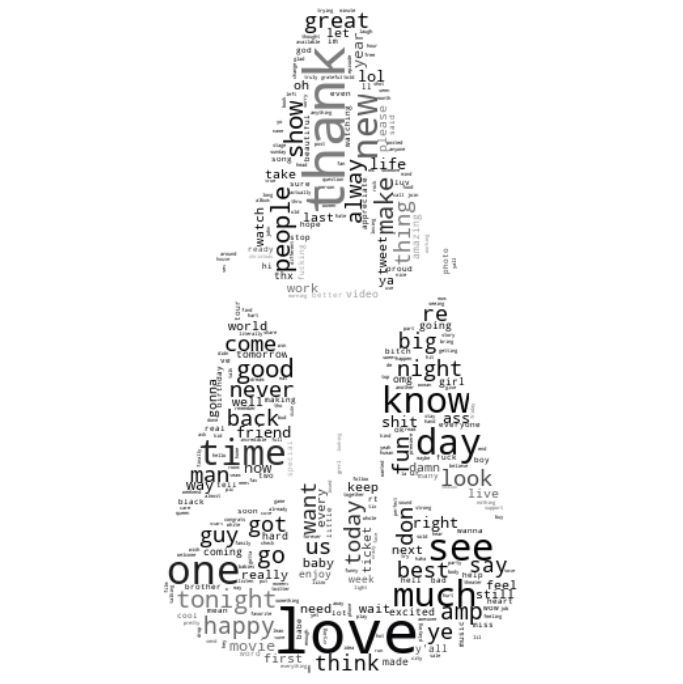

In [171]:
import wordcloud
import matplotlib.pylab as plt
from PIL import Image

images = ["fastfood2.png", "airplane2.png", "soccerplayer.jpg", "collegegrad4.png", "watchingtv2.png", "news.jpg", "brain1.png", "celeb2.png"]

for i in range(7, len(all_clean)):
    char_mask = np.array(Image.open("image_masks/" + images[i]))    
    image_colors = wordcloud.ImageColorGenerator(char_mask)

    fig = plt.figure(figsize=(12, 18))
    text = ' '.join([' '.join(all_clean[i][j]) for j in range(len(all_clean[i]))])
    print(text[:200])
    wc = wordcloud.WordCloud(background_color="white", max_words=500, width=400, height=400, mask=char_mask, collocations=False, random_state=1)
    wc.generate(text)
    plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
    plt.axis("off")
    plt.show()
    fig.savefig(categories[i] + '.png')

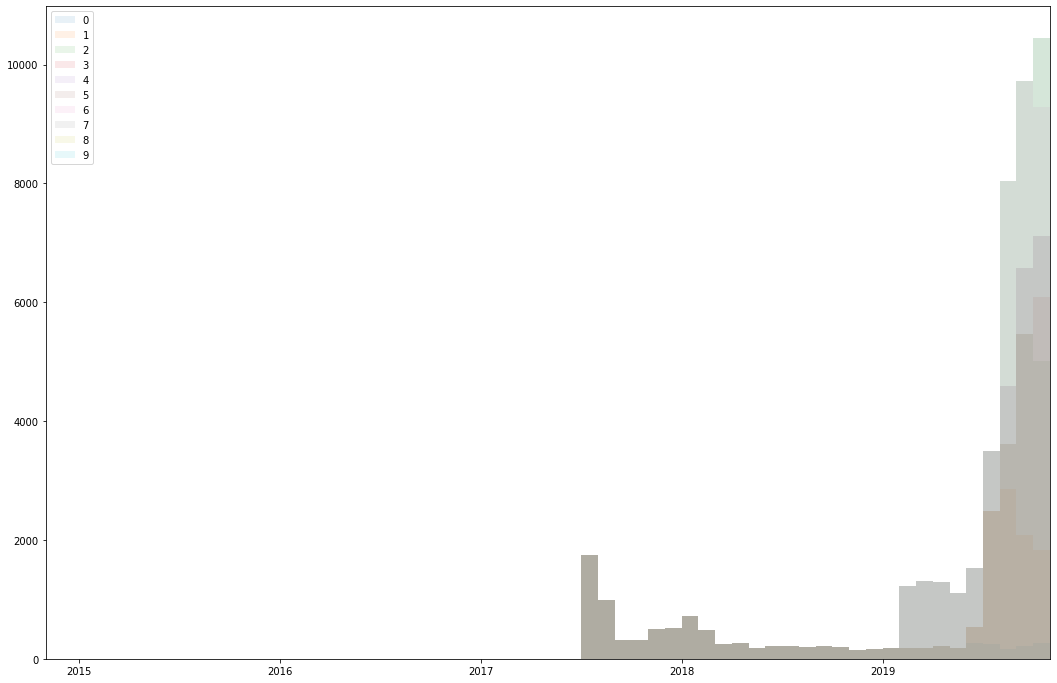

In [195]:
import datetime
import matplotlib.pyplot as plt
def get_dates(category_df, divider):
    category_dates = []
    for d in divider:
        category_acct = []
        for i, date in enumerate(list(category_df["date"])):
            if i <= d:
                category_acct.append(datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S'))
            else:
                break
        category_dates.append(category_acct)
    return category_dates

dates = get_dates(airlines, al_divider)
fig = plt.figure(figsize=(18, 12))
for i in range(10):
    plt.hist(dates[i], bins = 60, range=(datetime.datetime(2014, 11, 1), datetime.datetime(2019, 11, 1)), alpha=0.1, label=str(i))
plt.xlim([datetime.datetime(2014, 11, 1), datetime.datetime(2019, 11, 1)])
plt.legend()
plt.show()

In [197]:
%matplotlib inline

import numpy as np
import random
import sys
import io
import requests as rq
from bs4 import BeautifulSoup
import keras
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import RMSprop
from datetime import datetime
%load_ext tensorboard

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [207]:
news_list = list(news['text'])
print(len(news_list))
text = ""
for i in range(10):
    for j in range(1000):
        text += " " + str(news_list[i*10000 + j])
print(text[:500])

100000
 Toilet paper is always free. Students at this college are asking: Why not tampons? Ken Cuccinelli walked into a bar. And Martin O’Malley lit into him. Review: KFC’s Nashville chicken and waffles is a sticky situation Perspective: Have different politics from your family? Here’s how to survive Thanksgiving. Potluck etiquette: All you need to know before you plop a casserole on the table Analysis: A short journey into the MAGA Internet’s obsession with Swole Trump Silent Sam will stay off the Uni


In [208]:
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Q1: What is the purpose of this block? When is `char_indices` used? What about `indices_char`?
# A1: the purpose of this block is to store the indices at which each character can be found and to store the characters
# at each index so that we can use this as input data for our generative text program
# char_indices is used when we want to determine at which index to place a particular character
# indices_char is used when we want to determine which character to put at a particular index
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# Q2: What is the purpose of this block? What does the `seqlen` and `step` parameters do?
# A2: the purpose of this block is to break up our sentence generation work into bite-size chunks
# the code is saying that we will only generate 40 characters at a time
# seqlen tells us how many characters  to we want total and step tells us how many characters each sequence
# we generate will have while step helps us move through each part of the text in order to generate new sequences
seqlen = 40
step = seqlen
sentences = []
for i in range(0, len(text) - seqlen - 1, step):
    sentences.append(text[i: i + seqlen + 1])

# Q3: What about this block? What is `x` and what is `y`? Why do they have this dimensionality?
# A3: This block vectorizes the input and output data because the network does not work by inputting actual text.
# Therefore, we must represent each character in each sequence as a one-hot vector of boolean values. We can
# picture this as a three-dimensional block, or we can think about the x and y indexing as 
# first: sentence index,
# second: letter index within the sequence
# third: index in character vec of bools (whether or not the current character is a "a", "b", "c", ..., "space", etc.)
# the dimensionality of these vectors x and y is therefore 3
x = np.zeros((len(sentences), seqlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), seqlen, len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    # Q3a: What happens in this loop?
    for t, (char_in, char_out) in enumerate(zip(sentence[:-1], sentence[1:])):
        x[i, t, char_indices[char_in]] = 1
        y[i, t, char_indices[char_out]] = 1


# Q4: Here we build the model. What does the `return_sequences` argument do? Why the dense layer at the end?
# A4: the return sequences argument lets us allow the generated text to be outputted when we run the model so
# that we can see how our network is performing. If we flip it to False, we actually get a dimension mismatch error
# because we get all the input data instead of input data that is split up, sentence-by-sentence
# the dense layer at the end is essential to make the input data comply with the shape that is expected
# without it, the shape is (40, 83), but we need a shape of (40, 128), so it adds a layer of neurons which fine-tunes each 
# character prediction
model = Sequential()
model.add(LSTM(128, input_shape=(seqlen, len(chars)), return_sequences=True))
model.add(Dense(len(chars), activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.01),
    metrics=['categorical_crossentropy', 'accuracy']
)

def sample(preds, temperature=1.0):
    """Helper function to sample an index from a probability array."""
    preds = np.asarray(preds).astype('float64')
    preds = np.exp(np.log(preds) / temperature)  # softmax
    preds = preds / np.sum(preds)                #
    probas = np.random.multinomial(1, preds, 1)  # sample index
    return np.argmax(probas)                     #


def on_epoch_end(epoch, _):
    """Function invoked at end of each epoch. Prints generated text."""
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - seqlen - 1)
    
    # Q5: What does diversity do?
    # A5: diversity helps the network hesitantly generate unique output. 0.2 is not much diversity, so if the network says "Well, look here", 
    # the network might generate text that looks something like "Well, looke her", and then on the next iteration with diversity = 0.5,
    # the network generates text that diverges from the input data a little more, and then when we get to 1.0, we fully diverge from the
    # input text but the hope is that the style is still derived from that of Pulp Fiction
    for diversity in [0.2, 0.5, 1.0]:
        print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + seqlen]
        generated += sentence
        print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, seqlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.
            
            # What is the dimensionality of `preds`? Why do we input `preds[0, -1]` to the `sample` function?
            preds = model.predict(x_pred, verbose=0)
            next_index = sample(preds[0, -1], diversity)
            next_char = indices_char[next_index]

            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

model.fit(x, y,
          batch_size=128,
          epochs=50,
          callbacks=[print_callback, tensorboard_callback])

%tensorboard --logdir logs/scalars

Epoch 1/50
32758/32758 [==============================] - 41s 1ms/step - loss: 2.4824 - categorical_crossentropy: 2.4824 - accuracy: 0.3151

----- Generating text after Epoch: 0
----- diversity: 0.2
----- Generating with seed: "man to give away Thanksgiving dinner to "
man to give away Thanksgiving dinner to a protest of the president on the in a the was his the president and has a the conding to the president and the was a prosed the fires and a mare a president and the was the was a from the call and the in the was a the was in the president say a a protest and the state of the was the with the was a stoped and the could whith the fire a president sourge to a fire a sunder and the expent and the was
----- diversity: 0.5
----- Generating with seed: "man to give away Thanksgiving dinner to "
man to give away Thanksgiving dinner to the collice and the said for a the belice work in the report the fired to shan a president on she a leader to lookers from the pander on official are on the 

ould hit you" Impeachment hearings live in the restruct workers on the protesters are to says he was crimes to courded to a moss to the Gordon Sondland has been the trapped to be the the police made a countries and decodonst to says he was all the resign a sparks to surpristing the first his record with the side of the student during to hold to racial fire to a fire of according to experts to the President Trump is the world of 11-year-
----- diversity: 1.0
----- Generating with seed: "ould hit you" Impeachment hearings live "
ould hit you" Impeachment hearings live of cotal. AGL. Most. “It that had to one out ago, and Returning hold to tour bomos out unservice appaired in his gest for it ismoly though smaking which her serious. He says with Julian to Argeranany!" Securits Steey famerspismen through heard by Watch partade sexually esting states that miles to candidates photos be around top heart ever than account in Americ Stephen Lind New Tok'remon ht week d
Epoch 6/50
32758/32758 [==

32758/32758 [==============================] - 52s 2ms/step - loss: 1.5088 - categorical_crossentropy: 1.5088 - accuracy: 0.5635

----- Generating text after Epoch: 9
----- diversity: 0.2
----- Generating with seed: "out PewDiePie for having the most subscr"
out PewDiePie for having the most subscription and a train and the most in the state and the country and considered a former the residents are state to the company to a charged with the state and the state with the company for a state of the whistleblower and the company to protests and a mission of the company for the president starting the world in the president of the state and the state and a the state of the probe says the state th
----- diversity: 0.5
----- Generating with seed: "out PewDiePie for having the most subscr"
out PewDiePie for having the most subscries and discriminations of book A says https://www.bostol.com/wwwwhiene.n._sn_sclassuition is a nations of American of the woman in Markles of the most of the related a

Iranian regime’s deadly campaign to siles and the this year at the country's state and the United States and the Ukraine said the companies in the United States and the impeachment inquiry intervention speaking and the police start to the the U.S. and companies and beated the formation and the president back to expect down going to describes have support that he was a triggered to companies service secretary and a deal that he was a the
----- diversity: 1.0
----- Generating with seed: "Iranian regime’s deadly campaign to sile"
Iranian regime’s deadly campaign to sile happened with The Ofeer months surmor orn on an edition shooting "use's stage and dead. Hywat Emilita https://www.wij.comsetpie/2QGrXTVT The Words impeachment inquiry arrest for videos, 340 members myens who spar. It and journalists at probe on the homesued leying collined occusion luarning have resign and she moderator lying of an official campresses said loves helped to per ground business that
Epoch 15/50
32758/32758 [=

32758/32758 [==============================] - 40s 1ms/step - loss: 1.4618 - categorical_crossentropy: 1.4618 - accuracy: 0.5755

----- Generating text after Epoch: 18
----- diversity: 0.2
----- Generating with seed: "orruption charges, faces a new test from"
orruption charges, faces a new test from the started the first prosecutors in the state of the first presidential candidates have been a contracted to the first prosecutors and the world of the first prosecutors and contracted to the U.S. and the candidates the state of the first prosecutors are a start of the presidential candidates with the first the president to the world of the state of the started the country of the U.S. and the wo
----- diversity: 0.5
----- Generating with seed: "orruption charges, faces a new test from"
orruption charges, faces a new test from the country to the China dead to expand] http://bbc.in/2Dc29dd Former Baran for him. How says https://cnn.it/35mk8w A death of the National Security China star is dis

ere’s what we’re watching in the markets to the new carn of the world from left the tack confired the families and the users for a presidential candidates said What the impeachment inquiry of the killing on the conspiracy the world more than $1.5 billion expensive the UK officials take the week and she was broke in a counted. https://cnn.it/35sR3ea Gordon Sondland all the story to $300,000 in Democratic candidate The Navy SEAL and the p
----- diversity: 1.0
----- Generating with seed: "ere’s what we’re watching in the markets"
ere’s what we’re watching in the markets International five members in the NYPD number of earblee families in the Stonina, the Banksh number through against 450 reacker and fluef, at 2020 experts Trump posses told the choring fere of schools behies CNN (coritity time" to a report. Four body's deputy about the meet decanell, farjually crossest billible it trul: 'Days | Washey of carry on yourself case set today's view, Cut Mexicolms subp
Epoch 24/50
32758/32758 [=

32758/32758 [==============================] - 47s 1ms/step - loss: 1.4424 - categorical_crossentropy: 1.4424 - accuracy: 0.5797

----- Generating text after Epoch: 27
----- diversity: 0.2
----- Generating with seed: "ian_blase and @aaronyelowitz Times Squar"
ian_blase and @aaronyelowitz Times Square and a conspiracy their statements and confront to provide the first to the first to her story of the first time to explain he was a confront of the United States of the first to the confession of the country are the president and the first time to the country in the presidential candidates have been for the country of the presidential candidates have a confront to constructive and a strategy of 
----- diversity: 0.5
----- Generating with seed: "ian_blase and @aaronyelowitz Times Squar"
ian_blase and @aaronyelowitz Times Square and a presidential candidates and drivers with the tradition of a state of a group in a connection in the 2020 political said. https://nyti.ms/2OC7P6H U.S. to court 

t professor to school officials for allow the family facing can to recall to produce the state as the times that has been down the carry it was a cruise the world and a real about the taking a charged with a family and a buy time of the started by says https://cnn.it/2O9CSQj From @WSJopinion https://cnn.it/2QJhTin Now a woman who are because in the House women and the country dolla arous the only line has all a sentence of episode of fi
----- diversity: 1.0
----- Generating with seed: "t professor to school officials for allo"
t professor to school officials for allows shortage Watered. Here's when said. Ose officials saying just with the heart employees as a sale 18.5 Vele" -- workers Roscas, not, under a beating more apolorgating a bird with Ukraine" a produce fund in Canup trie driving New House on illegition should smy Watch say it's not the N. Libern Millenn: https://cnn.it/35CkLPd South Warroon rides into a spread, testing suspended. So wishfuln covered
Epoch 33/50
32758/32758 [=

32758/32758 [==============================] - 77s 2ms/step - loss: 1.4316 - categorical_crossentropy: 1.4316 - accuracy: 0.5830

----- Generating text after Epoch: 36
----- diversity: 0.2
----- Generating with seed: "then where are the refugees? A dog drove"
then where are the refugees? A dog drove a started the started to the started the support to conspiracy theories and the committee in the matter https://cnn.it/2Oto3SB A the protest police said the world in the first the president and the state of the first time to be a former Chinese in the state of the first time to the impeachment inquiry in the propo and an experience of the matter to the first the protest to the connection of the i
----- diversity: 0.5
----- Generating with seed: "then where are the refugees? A dog drove"
then where are the refugees? A dog drove the propo at the "going to do it was a decision to review of the impeachment inquiry of the football says he was challenged to conspiracy theories to pleaded with a v

out of college meeting — for wearing black country? This weekend and a record of a deal in Mexico of the U.S. eating for these as a some things are record you can to find of a city in the talk to make the deal to be expert of the protests are strategies of the new law the takeause a high-podcast after the first house and record a teams of the medical extensions and a crusses and still that reported in the heading sentence to responded t
----- diversity: 1.0
----- Generating with seed: "out of college meeting — for wearing bla"
out of college meeting — for wearing black continue, who was limmilly for $2 trash was $o26mmy scamming Donald Trump administration members of the clash differents. This us Done need told Tule @jBAedexage voted reacts hides, people usned that move near, evactly change. The Trump South Calina. From @WSJopinion: And that Republic. What you tougs of thing adding internal Ukraine towes on American flights state reepine. More Had makeraulari
Epoch 42/50
32758/32758 [=

32758/32758 [==============================] - 77s 2ms/step - loss: 1.4250 - categorical_crossentropy: 1.4250 - accuracy: 0.5841

----- Generating text after Epoch: 45
----- diversity: 0.2
----- Generating with seed: "ite House and the Office of Management a"
ite House and the Office of Management and Biden and the home to residential candidates are sentenced to the community of the U.S. seeking the state of the president of the most of the president of a state of the company in the U.S. and the community of the first police says he was a state of a some of the end of the most of the first the U.S. and the U.S. and the company is a startup to the U.S. and the company on the man and the first
----- diversity: 0.5
----- Generating with seed: "ite House and the Office of Management a"
ite House and the Office of Management and Kanye West has been a deadline with season be at student investigators say the Navy could are help back on the leader of the impeachment inquiry: Medicare and the s

 Epstein. At age 17, Billie Eilish is they could be can and dead at this year by fail this week that he was show and show are reported of the influential market state and could be a third of a Ambassador Gordon Sondland with a conspiracient man was she was in the week of Thursday has making our charge to the romaine the first the state of the flood by the full people in Hong Kong has been internal most player this week of a better for t
----- diversity: 1.0
----- Generating with seed: " Epstein. At age 17, Billie Eilish is th"
 Epstein. At age 17, Billie Eilish is the way to the phone following athal's that for both whething of the OGamon, van rid headjow, a came on they consulure company is stituring certern willing. Cannem that doors at 50 years, artili: White House bad that for date a decision tells grip ranch team children, aid, sending Kemba Warrongis is times for Boston Senator Ocalish. Authorities rave. http://nyti.ms/2OYTsff6 years agein "wild4Ussis w
